# Kaggle Titanic Project
Problem Statement:
Given PassengerId, Pclass, Name, Sex, Age, Parch, Ticket, Fare, Cabin, and Embarked, predict Survived or not.
Data Format:
PassengerId: 1, 2, ..., N :integer
Pclass: 1, 2, 3 : integer
Name: Last_Name, Title. First_Name_and_Other_Parts - comma and period separated : string : object
Sex: Male, Female : string : object
Age: nn.mm : float
SibSp: 0, 1, 2, ... : integer
Parch: 0, 1, 2, ... : integer
Ticket: string : object
Fare: xyz.mm : float
cabin: string : object
Embarked: character : object

We assume the data has been downloaded, processed and loaded as .pickle file. I have created two .pickle files:
train_all.pickle - contains all provided data split into train, valid and test subsets
train_sample.pickle - contains smaller subsets of the train_all.pickle for working on the software

We start our analysis by unpickling the data.


In [1641]:
import os
import numpy as np
import pandas as pd
from six.moves import cPickle as pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

import matplotlib.pyplot as plt

DATA_ROOT = "./datasets"
CSV_FILENAME = "train.csv"
LABEL_LIST = ["Survived"]


##
path_to_data_dir = DATA_ROOT
csv_filename = CSV_FILENAME
csv_path = os.path.join(path_to_data_dir, csv_filename)
raw_data = pd.read_csv(csv_path)
raw_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [1642]:
## NOTE - WE SHOULD HAVE PASSENGERID TO BE THE INDEX
raw_data.index = raw_data.PassengerId
raw_data = raw_data.drop('PassengerId', axis = 1)
raw_data.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [1643]:
def randomize_data(data):
  
  """
  given a DataFrame with each row as one instance of data, returns a DataFrame that is randomized.
  """
  
  permutations = np.random.permutation(data.shape[0])
  shuffled_data = data.iloc[permutations, :]
  return shuffled_data


def load_data_as_DataFrame_from_csv_file(path_to_data_dir, csv_filename):
  csv_path = os.path.join(path_to_data_dir, csv_filename)
  raw_data = pd.read_csv(csv_path)
  raw_data.index = raw_data.PassengerId   ## The present data has an index for data
  raw_data = raw_data.drop('PassengerId', axis = 1)    
  return raw_data


def create_train_valid_test_sets(data, test_size = 0.2, valid_size = 0.2):
  """
  Split the full data set into three subsets 
  Returns the DataFrames train, valid, test in that order 
  """
  
  train_set_full, test = train_test_split(data, test_size=test_size, random_state=42)
  train, valid = train_test_split(train_set_full, test_size=valid_size, random_state=42)
  
  return train, valid, test

def select_samples_from_full(df, cutoff_size = 1000):
  num_samples = df.shape[0]
  if num_samples > cutoff_size:
    sample_size = cutoff_size
  else:
    sample_size = df.shape[0]
  return sample_size

def separate_X_and_y(df, label_list):
  X = df[df.columns.difference(label_list)]
  y = df[label_list]
  return X, y

def generate_working_datasets(path_to_data_dir, csv_filename, label_list):

  data = load_data_as_DataFrame_from_csv_file(path_to_data_dir, csv_filename)
  randomized_data = randomize_data(data)

  train, valid, test = create_train_valid_test_sets(randomized_data, test_size = 0.2, valid_size = 0.2)
  
  sample_train_size = select_samples_from_full(train)
  sample_valid_size = select_samples_from_full(valid)
  sample_test_size = select_samples_from_full(test)
  
  sample_train = train.iloc[:sample_train_size, :]
  sample_valid = valid.iloc[:sample_valid_size, :]
  sample_test = test.iloc[:sample_test_size, :]
   
  # separate the X and y in each set
  
  X_train, y_train = separate_X_and_y(train, label_list)
  X_valid, y_valid = separate_X_and_y(valid, label_list)
  X_test, y_test = separate_X_and_y(test, label_list)
  X_sample_train, y_sample_train = separate_X_and_y(sample_train, label_list)
  X_sample_valid, y_sample_valid = separate_X_and_y(sample_valid, label_list)
  X_sample_test, y_sample_test = separate_X_and_y(sample_test, label_list)

# package for easier handling

  datasets_all = {
      "X_train" : X_train, "y_train" : y_train,
      "X_valid" : X_valid, "y_valid" : y_valid,
      "X_test" : X_test, "y_test" : y_test,
      }
  datasets_sample = {
      "X_sample_train" : X_sample_train, "y_sample_train" : y_sample_train,
      "X_sample_valid" : X_sample_valid, "y_sample_valid" : y_sample_valid,
      "X_sample_test" : X_sample_test, "y_sample_test" : y_sample_test,
      }
 
  return datasets_all, datasets_sample


def save_datasets(path_to_data_dir, csv_filename, datasets, is_sample = False):
  file_name_list = csv_filename.split('.')
  file_name_list_no_csv = file_name_list[0:-1]
  filename = ''.join(file_name_list_no_csv) # drope .csv
  if is_sample:
    filename_pickle = filename +'_samples'+ '.pickle'
  else:
    filename_pickle = filename +'_all'+ '.pickle'
  pickle_file = os.path.join(path_to_data_dir, filename_pickle)
#  print(pickle_file)
  try:
    with open(pickle_file, "wb") as f:
      print("\nSaving pickle file:", pickle_file)
      pickle.dump(datasets, f, pickle.HIGHEST_PROTOCOL)
  except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

## Call these function to separate data
label_list = LABEL_LIST
datasets_all, datasets_sample = generate_working_datasets(path_to_data_dir, csv_filename, label_list)
save_datasets(path_to_data_dir, csv_filename, datasets_all, is_sample = False)
save_datasets(path_to_data_dir, csv_filename, datasets_sample, is_sample = True)


Saving pickle file: ./datasets/train_all.pickle

Saving pickle file: ./datasets/train_samples.pickle


In [1644]:
def load_pickle_data(path_to_pickle_file, is_sample = False):
  ''' A utility function to load pickle data'''
  with open(path_to_pickle_file, 'rb') as f:
    saved = pickle.load(f)
    if is_sample:
      X_train = saved["X_sample_train"]
      y_train = saved["y_sample_train"]
      X_valid = saved["X_sample_valid"]
      y_valid = saved["y_sample_valid"]
      X_test  = saved["X_sample_test"]
      y_test  = saved["y_sample_test"]
 
    else:
      X_train = saved["X_train"]
      y_train = saved["y_train"]
      X_valid = saved["X_valid"]
      y_valid = saved["y_valid"]
      X_test  = saved["X_test"]
      y_test  = saved["y_test"]
        
    del saved # will free up memory
    return X_train, y_train, X_valid, y_valid, X_test, y_test


## Load Data from appropriate pickle file
IS_SAMPLE = True
# FOR TITANIC DATA
PICKLE_FILE_ALL_DATA = "./datasets/train_all.pickle"
PICKLE_FILE_SAMPLE_DATA = "./datasets/train_samples.pickle"

#--------------------------Do not change below  
is_sample = IS_SAMPLE
if is_sample:  
  path_to_pickle_file = PICKLE_FILE_SAMPLE_DATA
else:
  path_to_pickle_file = PICKLE_FILE_ALL_DATA

load_pickle_data(path_to_pickle_file, is_sample)
X_train, y_train, X_valid, y_valid, X_test, y_test = load_pickle_data(path_to_pickle_file, is_sample)
## NOTE: THIS X_TEST IS NOT THE TEST DATA PROVIDED FOR THE PROJECT

## Observations on Data

In [1645]:
X_train.head(2) ## check if loading worked

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket
PassengerId,,,,,,,,,,
665,20.0,NaN,S,7.9250,"Lindqvist, Mr. Eino William",0,3,male,1,STON/O 2. 3101285
486,NaN,NaN,S,25.4667,"Lefebre, Miss. Jeannie",1,3,female,3,4133


In [1646]:
X_train.dtypes  ## check the data types

Age         float64
Cabin        object
Embarked     object
Fare        float64
Name         object
Parch         int64
Pclass        int64
Sex          object
SibSp         int64
Ticket       object
dtype: object

### Index and PasssengerId are not same. We will just make note of this and not make index same as PassengerId
All that matters is that both X_train and y_train are using the same index values for the same passenger

#X_train = X_train.set_index("PassengerId") ##THIS WILL GO INTO THE DATA TRANSFORMATION PIPELINE


### CHANGE OF MIND: I WILL GO BACK A FEW STEPS ABOVE AND SET PASSENGERID TO BE INDEX

In [1647]:
X_train.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket
PassengerId,,,,,,,,,,
665,20.0,NaN,S,7.9250,"Lindqvist, Mr. Eino William",0,3,male,1,STON/O 2. 3101285
486,NaN,NaN,S,25.4667,"Lefebre, Miss. Jeannie",1,3,female,3,4133


In [1648]:
y_train.head(2)

,Survived
PassengerId,
665,1
486,0


###  WORK OUT RULES FOR HANDLING MISSING VALUES
#### Just to check which columns in X_train have missing values - this is just an exploration. BEWARE: We cannot look into the X_test, which mayhave a different set of missing columns that we will find in X_train. so, we need to have imputer that ADDRESS ALL COLUMNS, NOT JUST THE ONES WE CAN FIND IN THE X_TRAIN.

In [1649]:
# lets look at NaN's in all data columns
for col in X_train:
    print( col, 100*sum(pd.isnull(X_train[col]))/X_train.shape[0], '%' )

Age 20.2108963093 %
Cabin 78.2073813708 %
Embarked 0.175746924429 %
Fare 0.0 %
Name 0.0 %
Parch 0.0 %
Pclass 0.0 %
Sex 0.0 %
SibSp 0.0 %
Ticket 0.0 %


In [1650]:
# Based on fraction of NaN's in Cabin, we will drop Cabin ## Will be handled by pipeline
# While we are at it, we should check out these for raw_data - the original DataFrame
raw_data.shape

(891, 11)

In [1651]:
print("NANs in the full train data:")
for col in raw_data:
    df = raw_data
    print( col, 100*sum(pd.isnull(df[col]))/df.shape[0], '%' )

NANs in the full train data:
Survived 0.0 %
Pclass 0.0 %
Name 0.0 %
Sex 0.0 %
Age 19.8653198653 %
SibSp 0.0 %
Parch 0.0 %
Ticket 0.0 %
Fare 0.0 %
Cabin 77.1043771044 %
Embarked 0.224466891134 %


### ORDER OF OUR WORK
#### MISSING VALUES IN CABIN
#### MISSING VALUES IN EMBARK
#### MISSING VALUES IN AGE
-----------------------------------------------------------------------
AFTER THESE EXPLORATIONS, I WILL WRITE AN IMPUTER CLASS THAT WE CAN USE IN A PIPELINE AND TRANSFORM ALL DATASETS.

#### MISSING VALUES IN CABIN
THERE ARE TOO MANY MISSING VALUES IN CABIN. ONE SIMPLE STRATEGY WILL BE TO JUST DELETE THEM, BUT THAT WOULD MEAN LOSING INFORMATION CONTAINED IN OTHER VARIABLES THAT CORRESPOND TO THAT ROW. THIS IS USUALLY NOT AN OPTIMAL SOLUTION. WE CAN REPLACE THE NANS IN CABIN NY LETTER U. I ALSO NOTICED THAT CABIN NAMES HAVE A LETTER AND SOME NUMBERS. WE WILL AGGREGATE THEM INTO JUST LETTERS, OTHERWISE THERE WILL BE TOO MANY CATEGORIES ARIZING FROM CABIN COLUMN.

In [1652]:
### We will replace NaN in cabin by letter U and other cabins will a single letter
def fill_cabin_name_NaN_by_letter (df):

    df[['Cabin']] = df[['Cabin']].fillna(value='U')

fill_cabin_name_NaN_by_letter (X_train)

In [1653]:
X_train.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket
PassengerId,,,,,,,,,,
665,20.0,U,S,7.9250,"Lindqvist, Mr. Eino William",0,3,male,1,STON/O 2. 3101285
486,NaN,U,S,25.4667,"Lefebre, Miss. Jeannie",1,3,female,3,4133
63,45.0,C83,S,83.4750,"Harris, Mr. Henry Birkhardt",0,1,male,1,36973
584,36.0,A10,C,40.1250,"Ross, Mr. John Hugo",0,1,male,0,13049
757,28.0,U,S,7.7958,"Carlsson, Mr. August Sigfrid",0,3,male,0,350042
381,42.0,U,C,227.5250,"Bidois, Miss. Rosalie",0,1,female,0,PC 17757
90,24.0,U,S,8.0500,"Celotti, Mr. Francesco",0,3,male,0,343275
849,28.0,U,S,33.0000,"Harper, Rev. John",1,2,male,0,248727
271,NaN,U,S,31.0000,"Cairns, Mr. Alexander",0,1,male,0,113798


In [1654]:
#def process_cabin (df):  # This JUST PUTS THE TWO FUNCTIONS ABOVE INTO ONE - I SHOULDN'T USE IT THOUGH
#    fill_cabin_name_NaN_by_letter (df, 'Cabin')
#    replace_cabin_name_by_single_letter(df, 'Cabin')
#process_cabin (X_train)

### MISSING VALUES IN EMBARKED
Next we will look at Embarked - replace the NaNs here by the most common one since so few are missing and this is as good a guess as any

In [1655]:
def process_embarked(df):  # This is the one that should go into data transformation ***********
    ''' replace_NaN_in_Embarked_by_most_common '''
    embarkation_counts = X_train['Embarked'].value_counts()
    most_common = embarkation_counts.index[0]
    df[['Embarked']] = df[['Embarked']].fillna(value=most_common)
print( X_train[pd.isnull(X_train['Embarked']) ] )
print( X_train['Embarked'].value_counts() )
process_embarked(X_train)
#print(X_train.loc[61,:])  # must use .loc here since iloc is not what 61 and 829 are!
#print(X_train.loc[829,:])

              Age Cabin Embarked  Fare  \
PassengerId                              
830          62.0   B28      NaN  80.0   

                                                  Name  Parch  Pclass     Sex  \
PassengerId                                                                     
830          Stone, Mrs. George Nelson (Martha Evelyn)      0       1  female   

             SibSp  Ticket  
PassengerId                 
830              0  113572  
S    416
C     97
Q     55
Name: Embarked, dtype: int64


### MISSING VALUES IN AGE
We could just replace the missing values in Age by the median of Age column. But, here we can actually do better if we make use of the Title in the given names and coarse-grain the Age into reasonable bins.
Age-group : Age
Baby  : 0 - 2
Child : 2 - 10
Young_adult : 10 - 18
Adult : 18-50
Old : 50 : 65
Very_old : 65+
If Title is Master or Miss use median of categories Baby, Child and Young_adult.
For other Titles use median of the rest.
Therefore, we will need to extract titles


#### DEALING WITH MISSING AGE BY SIMPLE REPLACEMENT BY MEDIAN
THERE IS ALREADY A READY-MADE IMPUTER IN SKLEARN.PREPROCESSING.

In [1656]:
from sklearn.preprocessing import Imputer
imputer_for_age = Imputer(strategy = 'median')  ## This needs numerical columns
the_ages = X_train[['Age']]
col_name_age = list( the_ages.columns )
the_ages.head(10)

,Age
PassengerId,
665,20.0
486,NaN
63,45.0
584,36.0
757,28.0
381,42.0
90,24.0
849,28.0
271,NaN


In [1657]:
imputer_for_age.fit(the_ages)
the_age_column = pd.DataFrame( imputer_for_age.transform(the_ages) )
the_age_column.columns = col_name_age
the_age_column.index = the_ages.index
the_age_column.head(10)

,Age
PassengerId,
665,20.0
486,28.0
63,45.0
584,36.0
757,28.0
381,42.0
90,24.0
849,28.0
271,28.0



#### IMPROVING MISSING AGES WITH MORE COMPLICATED RULES - TO BE ATTEMPTED IN THE FUTURE
#### EXTRACT TITLE INFORMATION IN NAMES
(1) IF PASSENGER HAS TITLE MASTER OR MISS, THEN REPLACE NAN BY MEDIAN OF PASSENGERS IN AGE RANGE 0-18
(2) OTHERWISE REPLACE THE AGE BY MEDIAN OF AGES 18 +

In [1658]:
## TO CALCULATE THE MEDIANS NEEDED
the_age_series = X_train['Age']

In [1659]:
the_age_series.head()

PassengerId
665    20.0
486     NaN
63     45.0
584    36.0
757    28.0
Name: Age, dtype: float64

In [1660]:
low_age = the_age_series[ the_age_series < 18]

In [1661]:
high_age = the_age_series[ the_age_series >= 18 ]

In [1662]:
LOW_AGE_MEDIAN = low_age.median() # MUST REMEMBER THIS NUMBER WHICH WILL BE USED WITH THE TEST SET
HIGH_AGE_MEDIAN = high_age.median()
print('LOW_AGE_MEDIAN ', LOW_AGE_MEDIAN, 'HIGH_AGE_MEDIAN = ', HIGH_AGE_MEDIAN)

LOW_AGE_MEDIAN  9.0 HIGH_AGE_MEDIAN =  31.0


In [1663]:
def find_median_ages_for_impputation(X_train):
    the_age_series = X_train['Age']
    low_age = the_age_series[ the_age_series < 18]
    high_age = the_age_series[ the_age_series >= 18 ]
    low_age_median = low_age.median() # MUST REMEMBER THIS NUMBER WHICH WILL BE USED WITH THE TEST SET
    high_age_median = high_age.median()
    return low_age_median, high_age_median
low_age_median, high_age_median = find_median_ages_for_impputation(X_train)
print('low_age_median = ', low_age_median, 'high_age_median = ', high_age_median)

low_age_median =  9.0 high_age_median =  31.0


In [1664]:
## WE have to write our own imputer Class

# TODO write imputer class
    

## SOME DATA TRANSFORMATION IDEAS TO EXPLORE

### AGGREGATE CABIN INTO SINGLE LETTER CATEGORIES
FOR INSTANCE CABIN C123 AND C45 WILL BOTH BE IN CATEGORY CABIN C. WE HAVE ALREADY WORKED ON THIS IN THE ABOVE AND NOW I WANT TO MOVE THOSE CODES HERE FOR ORGANIZATION PURPOSES.

In [1665]:
def replace_cabin_name_by_single_letter(df, cabin ='Cabin'):    ## THIS FUNCTION SHOULD GO INTO TRANSFORMER NOT IN IMPUTER
    # mapping each Cabin value with the cabin letter
    df_cp = df.copy()
    df_cp[cabin] = df_cp[cabin].map(lambda c : c[0])
    return df_cp
X_train = replace_cabin_name_by_single_letter(X_train)
X_train.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket
PassengerId,,,,,,,,,,
665,20.0,U,S,7.9250,"Lindqvist, Mr. Eino William",0,3,male,1,STON/O 2. 3101285
486,NaN,U,S,25.4667,"Lefebre, Miss. Jeannie",1,3,female,3,4133
63,45.0,C,S,83.4750,"Harris, Mr. Henry Birkhardt",0,1,male,1,36973
584,36.0,A,C,40.1250,"Ross, Mr. John Hugo",0,1,male,0,13049
757,28.0,U,S,7.7958,"Carlsson, Mr. August Sigfrid",0,3,male,0,350042
381,42.0,U,C,227.5250,"Bidois, Miss. Rosalie",0,1,female,0,PC 17757
90,24.0,U,S,8.0500,"Celotti, Mr. Francesco",0,3,male,0,343275
849,28.0,U,S,33.0000,"Harper, Rev. John",1,2,male,0,248727
271,NaN,U,S,31.0000,"Cairns, Mr. Alexander",0,1,male,0,113798


In [1666]:
X_train['Cabin'].value_counts()

U    445
C     39
B     26
E     19
D     19
A     10
F      8
G      2
T      1
Name: Cabin, dtype: int64

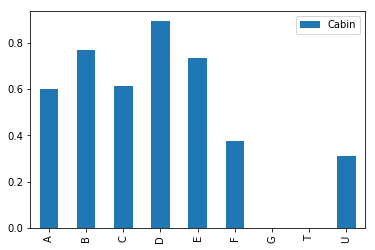

In [1667]:
### Lets see if there is any pattern to the survival based on cabin category
def survived_by_cabin (X,y):
    X_copy = X
    X_copy[list(y.columns)] = y
    counts_by_cabin = X_copy['Cabin'].value_counts()
    survived_by_cabin = X_copy[X_copy['Survived'] == 1]['Cabin'].value_counts()
    frac_surv_by_cabin = (1.0*survived_by_cabin)/counts_by_cabin
    return frac_surv_by_cabin
d = pd.DataFrame( survived_by_cabin(X_train,y_train) )
#d.loc[ ['Baby', 'Child', 'Young', 'Adult', 'Old', 'Very_Old'] ].plot(kind='bar')
d.plot(kind='bar')
plt.show()
## Looks like Cabin letter is also a good indicator - If you are U or T or A you have much less chance
## If you are B, C, D, E, you have way better chance

### EXTRACT TITLE FROM NAME
While we are at it we can extract several titles

Master
Mr
Miss
Mrs
Professional for Dr and Rev
Military for Maj, Cap, Col, Sgt,...
Nobility for Hon, Count, Countess, Don

We will get all the titles by value_counts()

In [1668]:
def extract_titles_1 (df1, column = 'Name'):
    df = df1.copy()
    df['Title'] = df[column].map( lambda name: name.split(',')[1].split('.')[0].strip() )
    title_counts = df['Title'].value_counts()
    return title_counts
extract_titles_1 (raw_data)

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Jonkheer          1
Capt              1
Ms                1
Mme               1
Don               1
the Countess      1
Lady              1
Sir               1
Name: Title, dtype: int64

In [1669]:
## Keep dictionary of titles
title_dict = {
    'Mr' : 'Mr',
    'Miss' : 'Miss',
    'Mrs' : 'Mrs', 'Ms' : 'Mrs',
    'Master' : 'Master',
    'Dr' : 'Professional',  'Rev' : 'Professional',
    'Col' : 'Military', 'Maj' : 'Military', 'Capt' : 'Military',
    'Lady' : 'Nobility', 'Sir' : 'Nobility', 'Mlle' : 'Nobility', 'Mme' : 'Nobility',
    'Don' : 'Nobility', 'the Countess' : 'Nobility', 'Jonkheer'  : 'Nobility',
}

In [1670]:
def extract_titles_2 (df1, column = 'Name'):
    df = df1.copy()
    df['Title'] = df[column].map( lambda name: name.split(',')[1].split('.')[0].strip() )
    df['Title'] = df['Title'].map(title_dict)
    title_counts = df['Title'].value_counts()
    return title_counts
print("Title counts in raw_data")
extract_titles_2 (raw_data)


Title counts in raw_data


Mr              517
Miss            182
Mrs             126
Master           40
Professional     13
Nobility          8
Military          3
Name: Title, dtype: int64

In [1671]:
def extract_titles (df1, column = 'Name'):  #### THIS IS WHAT WE WANT IN THE FINAL TRANSFORMATION
    df = df1.copy()
    df['Title'] = df[column].map( lambda name: name.split(',')[1].split('.')[0].strip() )
    df['Title'] = df['Title'].map(title_dict)
#    title_counts = df['Title'].value_counts()
    return df
X_train = extract_titles (X_train)
X_train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket,Survived,Title
PassengerId,,,,,,,,,,,,
665,20.0,U,S,7.9250,"Lindqvist, Mr. Eino William",0,3,male,1,STON/O 2. 3101285,1,Mr
486,NaN,U,S,25.4667,"Lefebre, Miss. Jeannie",1,3,female,3,4133,0,Miss
63,45.0,C,S,83.4750,"Harris, Mr. Henry Birkhardt",0,1,male,1,36973,0,Mr
584,36.0,A,C,40.1250,"Ross, Mr. John Hugo",0,1,male,0,13049,0,Mr
757,28.0,U,S,7.7958,"Carlsson, Mr. August Sigfrid",0,3,male,0,350042,0,Mr


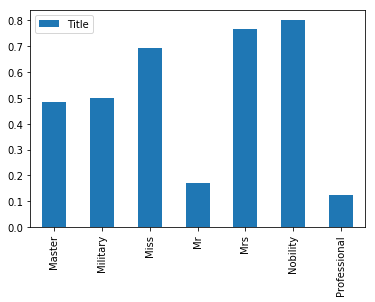

In [1672]:
## Lets visualize to see if this rerived feature will be effective
def survived_by_title (X,y):
    X_copy = X
    X_copy[list(y.columns)] = y
    counts_by_title = X_copy['Title'].value_counts()
    survived_by_title = X_copy[X_copy['Survived'] == 1]['Title'].value_counts()
    frac_surv_by_title = (1.0*survived_by_title)/counts_by_title
    return frac_surv_by_title
d = pd.DataFrame( survived_by_title(X_train,y_train) )
#d.loc[ ['Baby', 'Child', 'Young', 'Adult', 'Old', 'Very_Old'] ].plot(kind='bar')
d.plot(kind='bar')
plt.show()
## Apears to be a good categorizer - has distinct reaction: If you are Mr or Milaitary or Professional, you are doomed
## If you are a Master or Miss or Mrs or Nobility you have way better chance

### HOW ARE AGES DISTRIBUTED? SHOULD WE BIN AGES TO CAPTURE EFFECT BASED ON AGE_GROUPS?
THE RESULT BELOW SHOWS THAT AGGREGATING MASTER AND MISS WOULD NOT CAPTURE YOUNG CHILDREN AS A SEPARATE GROUP

In [1673]:
X_train.groupby('Title')['Age'].median()

Title
Master           4.0
Military        58.0
Miss            21.0
Mr              30.0
Mrs             34.0
Nobility        40.0
Professional    44.0
Name: Age, dtype: float64

#### AGGREGATING BY AGE GROUPS

In [1674]:
def add_age_group(df):
    df_cp = df.copy()
    age_groups = ['Baby', 'Child', 'Young', 'Adult', 'Old', 'Very_Old']
    age_bins = [0, 2, 10, 18, 55, 70, 120]
    df_cp['Age_Group'] = pd.cut(df_cp.Age, age_bins, right=False, labels=age_groups)
    return df_cp

X_train = add_age_group(X_train)

In [1675]:
#X_train = X_train.drop('Age_Group', axis = 1)
X_train.head(1)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket,Survived,Title,Age_Group
PassengerId,,,,,,,,,,,,,
665,20.0,U,S,7.925,"Lindqvist, Mr. Eino William",0,3,male,1,STON/O 2. 3101285,1,Mr,Adult


In [1676]:
age_medians = X_train.groupby('Age_Group')['Age'].median()
age_medians.__class__

pandas.core.series.Series

In [1677]:
age_medians['Baby']

0.92000000000000004

In [1678]:
age_medians

Age_Group
Baby         0.92
Child        4.00
Young       16.00
Adult       30.00
Old         60.00
Very_Old    75.25
Name: Age, dtype: float64

In [1679]:
X_train['Age_Group'].value_counts()

Adult       356
Young        36
Child        32
Old          19
Baby          9
Very_Old      2
Name: Age_Group, dtype: int64

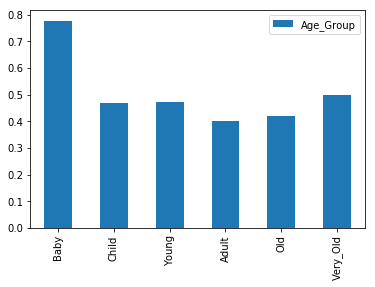

In [1680]:
## LETS VISUALIZE THE SURVIVAL BY AGE GROUPS
def survived_by_age (X,y):
    X_copy = X
    X_copy[list(y.columns)] = y
    counts_by_age = X_copy['Age_Group'].value_counts()
    survived_by_age = X_copy[X_copy['Survived'] == 1]['Age_Group'].value_counts()
    frac_surv_by_age = (1.0*survived_by_age)/counts_by_age
    return frac_surv_by_age
d = pd.DataFrame( survived_by_age(X_train,y_train) )
d.loc[ ['Baby', 'Child', 'Young', 'Adult', 'Old', 'Very_Old'] ].plot(kind='bar')
plt.show()
## Wow, no very old people survived and very high percentage of babies survived!!!
## This age_group will be a significant derived feature

### AGGREGATE TICKETS INTO SINGLE LETTER CATEGORIES
MAYBE JUST LIKE CABIN, THERE IS SOME ORDER TO THE TICKET NUMBERING

In [1681]:
def replace_ticket_name_by_single_letter(df, ticket = 'Ticket'):    ## THIS FUNCTION SHOULD GO INTO TRANSFORMER NOT IN IMPUTER
    # mapping each Cabin value with the cabin letter
    df_cp = df.copy()
    df_cp[ticket] = df_cp[ticket].map(lambda t : t[0])
    return df_cp
X_train = replace_ticket_name_by_single_letter(X_train)
X_train.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket,Survived,Title,Age_Group
PassengerId,,,,,,,,,,,,,
665,20.0,U,S,7.9250,"Lindqvist, Mr. Eino William",0,3,male,1,S,1,Mr,Adult
486,NaN,U,S,25.4667,"Lefebre, Miss. Jeannie",1,3,female,3,4,0,Miss,NaN


In [1682]:
X_train['Ticket'].value_counts()

3    198
2    116
1    102
S     37
P     35
C     29
A     18
W     11
4      8
7      7
F      3
L      1
9      1
5      1
8      1
6      1
Name: Ticket, dtype: int64

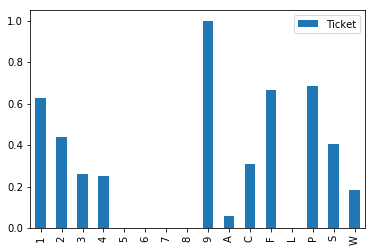

In [1683]:
### Lets see if there is any pattern to the survival based on cabin category
def survived_by_ticket (X,y):
    X_copy = X
    X_copy[list(y.columns)] = y
    counts_by_ticket = X_copy['Ticket'].value_counts()
    survived_by_ticket = X_copy[X_copy['Survived'] == 1]['Ticket'].value_counts()
    frac_surv_by_ticket = (1.0*survived_by_ticket)/counts_by_ticket
    return frac_surv_by_ticket
d = pd.DataFrame( survived_by_ticket(X_train,y_train) )
#d.loc[ ['Baby', 'Child', 'Young', 'Adult', 'Old', 'Very_Old'] ].plot(kind='bar')
d.plot(kind='bar')
plt.show()
## Boy, if you were W, L, A, 5, 6, 7, 8 - you will be most likely dead
## 1, 9, F, P - survived well 
## Looks like aggregating tickets is helpful

### SHOULD WE COMBINE PARCH AND SIBSP INTO A FAMILY CATEGORY? MAYBE, FAMILIES SURVIVE TOGETHER OR PERISH TOGETHER


In [1684]:
def add_family(df):   
    df1 = df.copy()
    df1['Family'] = df1['Parch'] + df1['SibSp']
    return df1
X_train = add_family(X_train)
X_train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket,Survived,Title,Age_Group,Family
PassengerId,,,,,,,,,,,,,,
665,20.0,U,S,7.9250,"Lindqvist, Mr. Eino William",0,3,male,1,S,1,Mr,Adult,1
486,NaN,U,S,25.4667,"Lefebre, Miss. Jeannie",1,3,female,3,4,0,Miss,NaN,4
63,45.0,C,S,83.4750,"Harris, Mr. Henry Birkhardt",0,1,male,1,3,0,Mr,Adult,1
584,36.0,A,C,40.1250,"Ross, Mr. John Hugo",0,1,male,0,1,0,Mr,Adult,0
757,28.0,U,S,7.7958,"Carlsson, Mr. August Sigfrid",0,3,male,0,3,0,Mr,Adult,0


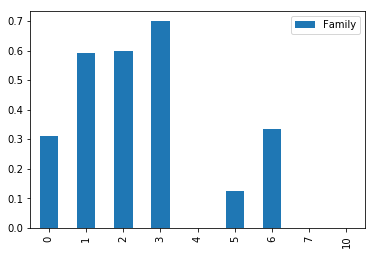

In [1685]:
## Lets display to see if this makes a difference
def survived_by_family (X,y):
    X_copy = X
    X_copy[list(y.columns)] = y
    counts_by_family = X_copy['Family'].value_counts()
    survived_by_family = X_copy[X_copy['Survived'] == 1]['Family'].value_counts()
    frac_surv_by_family = (1.0*survived_by_family)/counts_by_family
    return frac_surv_by_family
d = pd.DataFrame( survived_by_family(X_train,y_train) )
d.plot(kind='bar')
plt.show()

### WHAT TO DO WITH FARES? 
MAYBE LEAVE IT THERE AS A FLOAT VARIABLE - IT IS PROBABLY REDUNDANT SINCE THE INFORMATION ABOUT FARE IS WELL-AGGREGATED IN PCLASS

## SUMMARY OF TRANSFORMATIONS TO BE PERFORMED ON DATA - USING PIPELINE
#### IMPUTE:
##### FILL NAN IN ALL FLOAT VARIABLES BY MEDIAN - AGE AND FARE THE ONLY FLOAT VARIABLES
##### FILL NAN IN CABIN BY LETTER U
##### TYPE-CAST DTYPE OF ALL CATEGORIES TO OBJECTS
##### FILL NAN IN OBJECTS BY MODES IN EACH CASE
#### DERIVED VARIABLES: 
##### COVERT CABIN TO SINGLE CHARACTER CATEGORIES
##### EXTRACT AND ADD A NEW TITLE COLUMN
##### ADD AGE_GROUP COLUMN
##### CONVERT TICKET TO SINGLE CHANRATER CATEGORIES
##### ADD FAMILY CATEGORY
### WRITE TRANSFORMATIONS IN THE SPIRIT OF SKLEARN DEISGN PRINCIPLES
### START WITH FRESH COPY OF X_TRAIN, X_VALID, X_TEST AND APPLY THESE TRANSFORMATIONS

In [1686]:
IS_SAMPLE = False
is_sample = IS_SAMPLE
if is_sample:  
  path_to_pickle_file = PICKLE_FILE_SAMPLE_DATA
else:
  path_to_pickle_file = PICKLE_FILE_ALL_DATA

load_pickle_data(path_to_pickle_file, is_sample)
X_train, y_train, X_valid, y_valid, X_test, y_test = load_pickle_data(path_to_pickle_file, is_sample)
## NOTE: THIS X_TEST IS NOT THE TEST DATA PROVIDED FOR THE PROJECT
X_train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket
PassengerId,,,,,,,,,,
665,20.0,NaN,S,7.9250,"Lindqvist, Mr. Eino William",0,3,male,1,STON/O 2. 3101285
486,NaN,NaN,S,25.4667,"Lefebre, Miss. Jeannie",1,3,female,3,4133
63,45.0,C83,S,83.4750,"Harris, Mr. Henry Birkhardt",0,1,male,1,36973
584,36.0,A10,C,40.1250,"Ross, Mr. John Hugo",0,1,male,0,13049
757,28.0,NaN,S,7.7958,"Carlsson, Mr. August Sigfrid",0,3,male,0,350042


In [1687]:
def separate_features_into_dtypes (df):
    ''' separate out features according to dtypes'''
    float_features = df.dtypes == np.float64
    int_features = df.dtypes == np.int64
    obj_features = df.dtypes == np.object
    df_floats = df.loc[:, float_features]
    df_ints = df.loc[:, int_features]
    df_objs = df.loc[:, obj_features]
    return df_floats, df_ints, df_objs

X_train_floats, X_train_ints, X_train_objs = separate_features_into_dtypes (X_train)  
print( X_train_floats.head(2) )   
print( X_train_ints.head(2) ) 
print( X_train_objs.head(2) ) 

              Age     Fare
PassengerId               
665          20.0   7.9250
486           NaN  25.4667
             Parch  Pclass  SibSp
PassengerId                      
665              0       3      1
486              1       3      3
            Cabin Embarked                         Name     Sex  \
PassengerId                                                       
665           NaN        S  Lindqvist, Mr. Eino William    male   
486           NaN        S       Lefebre, Miss. Jeannie  female   

                        Ticket  
PassengerId                     
665          STON/O 2. 3101285  
486                       4133  


### IMPUTE CLASS

In [1688]:
from sklearn.base import TransformerMixin
import numpy as np
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.
        Columns of dtype object or int64 are imputed with the most frequent value 
        in column.
        Columns of other types are imputed with median of column. I modified this from ean to median.

        """
    def fit(self, X, y=None): 
        return self

    def transform(self, X, y=None):
        for col in X:
            c1 = pd.DataFrame(X[col], index = X.index)
            if c1.isnull().values.any():
                if c1.dtypes[0] == np.float64:
                    c1.fillna(c1.median(), inplace=True)
                elif c1.columns[0] == "Cabin":
                    for idx in c1.index:
                        if pd.isnull(c1.loc[idx, col]):
                            c1.loc[idx, col] = 'U'
                else:
                    dummy_mode = X[col].value_counts().index[0]
                    for idx in c1.index:
                        if pd.isnull(c1.loc[idx, col]):
                            c1.loc[idx, col] = dummy_mode
#                new_col_name = c1.columns[0]+'_filled'
                new_col_name = c1.columns[0]
                X[new_col_name] = c1
#                X = X.drop(c1.columns[0], axis = 1)
        
        return X

dfi = DataFrameImputer()
X_train_cp = X_train.copy()
dfi.fit(X_train_cp)
X_train_cp = dfi.transform(X_train_cp)
X_train_cp.head(15)
X_test_cp = X_test.copy()
X_test_cp = dfi.transform(X_test_cp)
X_test_cp.head(20)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket
PassengerId,,,,,,,,,,
663,47.00,E58,S,25.5875,"Colley, Mr. Edward Pomeroy",0,1,male,0,5727
868,31.00,A24,S,50.4958,"Roebling, Mr. Washington Augustus II",0,1,male,0,PC 17590
333,38.00,C91,S,153.4625,"Graham, Mr. George Edward",1,1,male,0,PC 17582
773,57.00,E77,S,10.5000,"Mack, Mrs. (Mary)",0,2,female,0,S.O./P.P. 3
581,25.00,U,S,30.0000,"Christy, Miss. Julie Rachel",1,2,female,1,237789
250,54.00,U,S,26.0000,"Carter, Rev. Ernest Courtenay",0,2,male,1,244252
231,35.00,C83,S,83.4750,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",0,1,female,1,36973
873,33.00,B51 B53 B55,S,5.0000,"Carlsson, Mr. Frans Olof",0,1,male,0,695
576,19.00,U,S,14.5000,"Patchett, Mr. George",0,3,male,0,358585


In [1689]:
print("Does any column have NaNs?")
pd.isnull(X_test_cp).any() ## check if the imputer did its job on X_train_cp

Does any column have NaNs?


Age         False
Cabin       False
Embarked    False
Fare        False
Name        False
Parch       False
Pclass      False
Sex         False
SibSp       False
Ticket      False
dtype: bool

### DERIVED_FEATURES_ADDER

In [1690]:
from sklearn.base import BaseEstimator, TransformerMixin
class Derived_Features_Adder( BaseEstimator, TransformerMixin ):
    def __init__(self, add_new_features = True): ## No *arg or **kargs needed
        #add_new_features is hyper parameter that can be used to turn off use of thee features
        add_new_features = add_new_features
    def fit(self, X, y = None):
        return self  ## nothing to fit from X_train; we want to add the same columns to all df
    
    def transform(self, X, y = None):
        # this is where we add new columns or transform content of any column
        ##### EXTRACT AND ADD A NEW TITLE COLUMN
        ##### ADD AGE_GROUP COLUMN
        ##### CONVERT TICKET TO SINGLE CHANRATER CATEGORIES
        ##### ADD FAMILY CATEGORY
        #### Drop Name
        X_with_cabins = replace_cabin_name_by_single_letter(X)
        X_with_titles = extract_titles(X_with_cabins)
        X_with_age_groups = add_age_group(X_with_titles)
        X_with_tickets = replace_ticket_name_by_single_letter(X_with_age_groups)
        X_with_family =  add_family(X_with_tickets)
        X_final = X_with_family.drop('Name', axis = 1) 

#        return X_with_age_groups
        return X_final
## Lets see they work
dfa = Derived_Features_Adder()

X_train_cp = dfa.fit_transform(X_train_cp)
X_train_cp.head()     

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Ticket,Title,Age_Group,Family
PassengerId,,,,,,,,,,,,
665,20.0,U,S,7.9250,0,3,male,1,S,Mr,Adult,1
486,28.0,U,S,25.4667,1,3,female,3,4,Miss,Adult,4
63,45.0,C,S,83.4750,0,1,male,1,3,Mr,Adult,1
584,36.0,A,C,40.1250,0,1,male,0,1,Mr,Adult,0
757,28.0,U,S,7.7958,0,3,male,0,3,Mr,Adult,0


In [1691]:
X_train_cp.dtypes

Age           float64
Cabin          object
Embarked       object
Fare          float64
Parch           int64
Pclass          int64
Sex            object
SibSp           int64
Ticket         object
Title          object
Age_Group    category
Family          int64
dtype: object

In [1692]:
## From Geron's book on ML
## We usually have four types of data - float(numerical), integer (ordinal - numerical), 
# integer (categorical - object), and string (categorical - object)
# Here we have:

# Age           float64 - must scale
# Cabin          object
# Embarked       object
# Fare          float64 - must scale
# Parch           int64 - ordinal - numerical - small number do not need scaling
# Pclass          int64 - ordinal - numerical
#Sex            object
#SibSp           int64 - ordinal - numerical - small number do not need scaling
#Ticket         object
#Title          object
#Age_Group    category
#Family          int64 - ordinal - numerical - small number do not need scaling



# Utility Class to select which pipeline we will apply

from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [1693]:
def dtype_sets (df):
    ''' separate out features according to dtypes'''
    float_features = df.dtypes == np.float64
    int_features = df.dtypes == np.int64
    obj_features = df.dtypes == np.object
    df_floats = df.loc[:, float_features]
    df_ints = df.loc[:, int_features]
    df_objs = df.loc[:, obj_features]
    return list(df_floats.columns), list(df_ints.columns), list(df_objs.columns)
floats, ints, cats = dtype_sets (X_train_cp)
print(floats)
print(ints)
print(cats)
X_train_cp = pd.get_dummies(X_train_cp, prefix=None, prefix_sep='_', dummy_na=False, columns=cats, sparse=False, drop_first=False)
print(X_train_cp.columns)
print(X_train_cp.shape)

['Age', 'Fare']
['Parch', 'Pclass', 'SibSp', 'Family']
['Cabin', 'Embarked', 'Sex', 'Ticket', 'Title']
Index(['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Age_Group', 'Family',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T', 'Cabin_U', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex_female', 'Sex_male', 'Ticket_1', 'Ticket_2',
       'Ticket_3', 'Ticket_4', 'Ticket_5', 'Ticket_6', 'Ticket_7', 'Ticket_8',
       'Ticket_9', 'Ticket_A', 'Ticket_C', 'Ticket_F', 'Ticket_L', 'Ticket_P',
       'Ticket_S', 'Ticket_W', 'Title_Master', 'Title_Military', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Nobility', 'Title_Professional'],
      dtype='object')
(569, 44)


In [1701]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

#floats = []
#ints = []
#cats = []

flt_pipeline = Pipeline([
        ('selector', DataFrameSelector(floats)),
#        ('imputer', Imputer(strategy="median")),
#        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cats)),
        ('label_binarizer', LabelBinarizer()),
    ])
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("flt_pipeline", flt_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])
X_train_prepared = pd.DataFrame(flt_pipeline.fit_transform(X_train_cp), index = X_train_cp.index)
keys = list( X_train_prepared.columns )
values = list( X_train_cp[floats].columns )

print( keys )
print( values )
dict_names = {}
for i in range(len(keys)):
    dict_names[keys[i]] = values[i]
print(dict_names)
#print( dict( zip(keys, values) ) ) # for some reson it is not working
X_train_prepared = X_train_prepared.rename(columns = dict_names)
X_train_prepared.head()

[0, 1]
['Age', 'Fare']
{0: 'Age', 1: 'Fare'}


,Age,Fare
PassengerId,,
665,-0.708796,-0.485319
486,-0.079001,-0.122652
63,1.259314,1.076643
584,0.550794,0.180402
757,-0.079001,-0.487990


In [1697]:
print(keys[1])

1


In [ ]:
X_train_floats, X_train_ints, X_train_objs = separate_features_into_dtypes (X_train_cp)  
print( X_train_floats.head(2) )   
print( X_train_ints.head(2) ) 
print( X_train_objs.head(2) ) 